In [26]:
# 
import os
import ete3
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace

NEWICK_FILE = os.path.join("H:\\", "AOC-REM2", "results", "mammalian_REM2", "mammalian_REM2_codons.SA.fasta.treefile")

In [27]:
t = Tree(NEWICK_FILE, format=1 )

for node in t.traverse("postorder"):
    #print(node.name.split("_"))
    edit = node.name.split("_")
    #print(edit)
    if "PREDICTED" in edit:
        node.name = " ".join(edit[4:6])
    else:
        node.name = " ".join(edit[3:5])


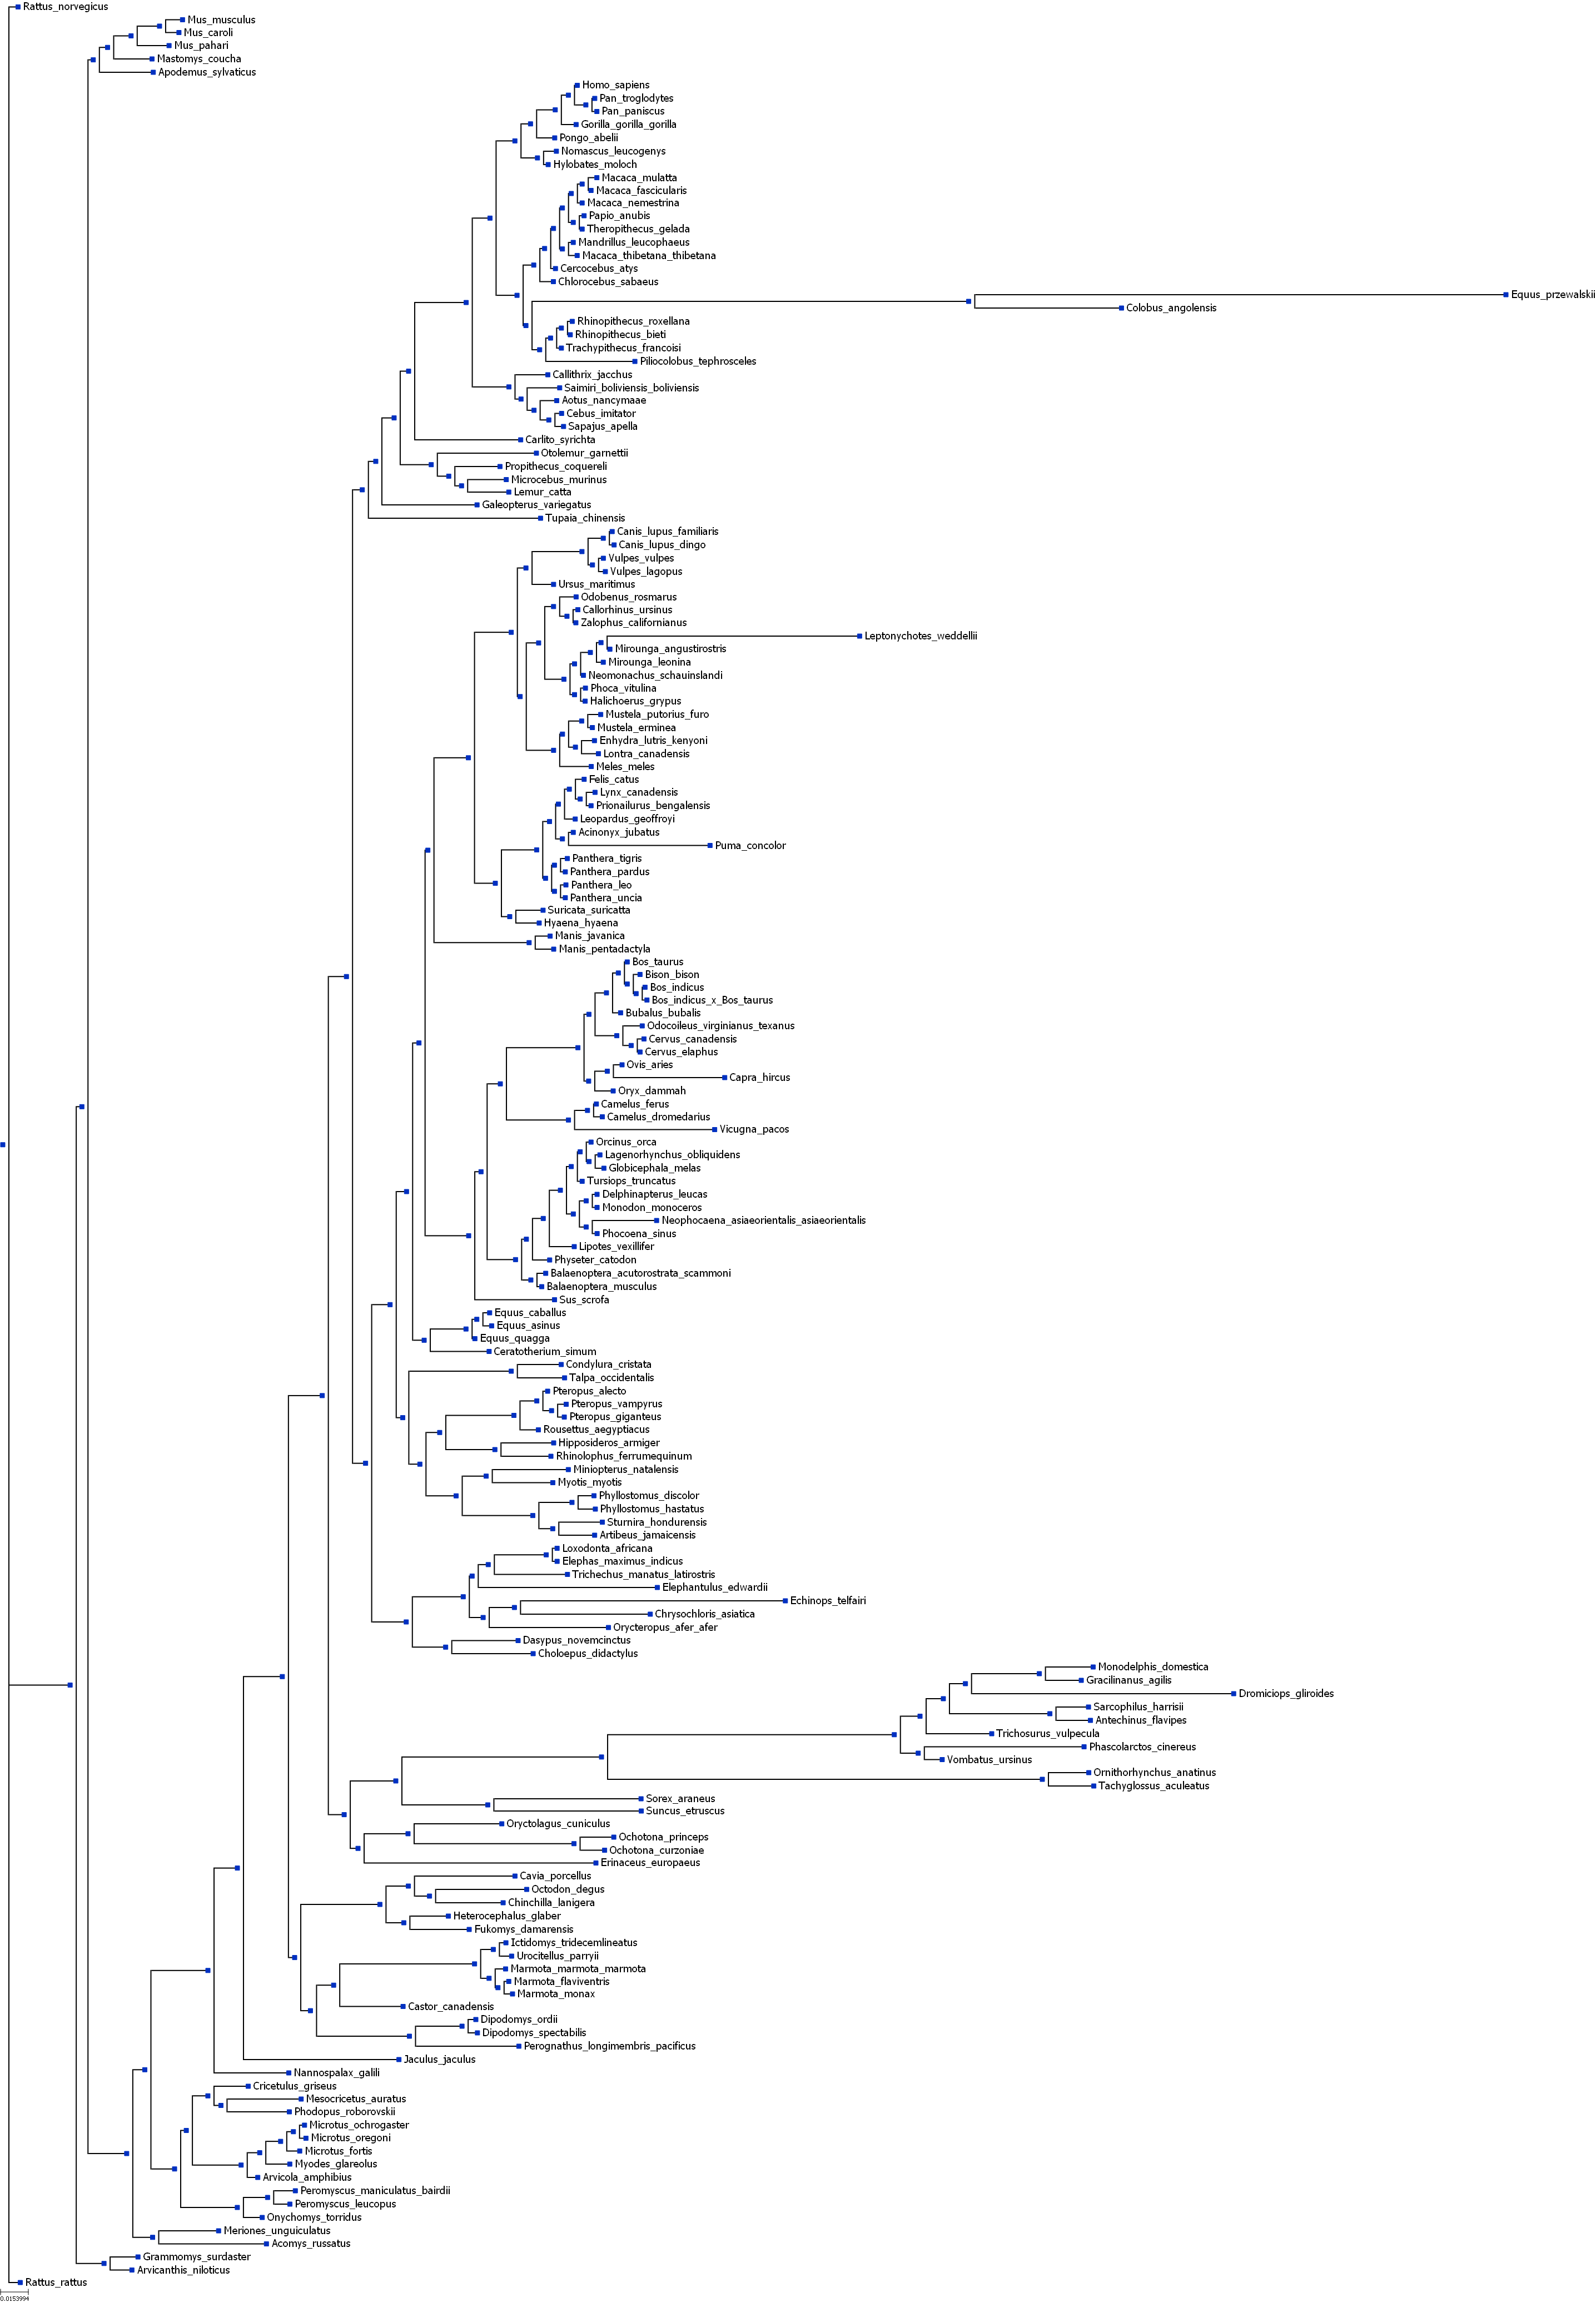

In [49]:
t = Tree(NEWICK_FILE, format=1 )
newick_dict = {}

for node in t.traverse("postorder"):
    #print(node.name.split("_"))
    original_name = node.name
    edit = node.name.split("_")
    #print(edit)
    # get location of RRAD
    if "RRAD" in edit:
        location = edit.index("RRAD") - 1
    elif "rad" in edit:
        location = edit.index("rad") - 1
    else:
        location = 5
    #end if
    
    if "PREDICTED" in edit:
        node.name = "_".join(edit[4: location + 1])
        newick_dict[original_name] = node.name 
    else:
        node.name = "_".join(edit[3: location + 1])
        newick_dict[original_name] = node.name 
    #end if
#end for

# init tree style
ts = TreeStyle()
# remove default labels
ts.show_leaf_name = False

widthscale= 2400

heightscale=5

height = t.get_farthest_node()[1]

ts.scale = widthscale / height

ts.branch_vertical_margin = heightscale

for n in t.traverse():
    nstyle = ete3.NodeStyle()
    nstyle['hz_line_width'] = 2
    nstyle['vt_line_width'] = 2
    nstyle['hz_line_color'] = 'black'
    nstyle['vt_line_color'] = 'black'
    nstyle['size'] = 8
    nstyle['shape'] = 'square'
    
    n.add_face(ete3.TextFace(f" {n.name}",
                                     ftype='Dejavu Sans',
                                     tight_text=True,
                                     fsize=14,
                                     fgcolor='black',
                                     ),
                                     column=0, 
                                     position='branch-right')
    
    
    
    n.set_style(nstyle)
#end for 
    
# render image on notebook
t.render("%%inline", tree_style=ts)



In [50]:
newick_dict

{'NM_022685_2_Rattus_norvegicus_RRAD_and_GEM_like_GTPase_2_Rem2_mRNA_1': 'Rattus_norvegicus',
 'NM_080726_3_Mus_musculus_rad_and_gem_related_GTP_binding_protein_2_Rem2_mRNA_1': 'Mus_musculus',
 'XM_021182512_1_PREDICTED_Mus_caroli_RRAD_and_GEM_like_GTPase_2_Rem2_mRNA_1': 'Mus_caroli',
 '': '',
 'XM_021203619_1_PREDICTED_Mus_pahari_RRAD_and_GEM_like_GTPase_2_Rem2_mRNA_1': 'Mus_pahari',
 'XM_031361298_1_PREDICTED_Mastomys_coucha_RRAD_and_GEM_like_GTPase_2_Rem2_mRNA_1': 'Mastomys_coucha',
 'XM_052190525_1_PREDICTED_Apodemus_sylvaticus_RRAD_and_GEM_like_GTPase_2_LOC127690950_mRNA_1': 'Apodemus_sylvaticus',
 'NM_173527_3_Homo_sapiens_RRAD_and_GEM_like_GTPase_2_REM2_mRNA_1': 'Homo_sapiens',
 'XM_009427474_3_PREDICTED_Pan_troglodytes_RRAD_and_GEM_like_GTPase_2_REM2_transcript_variant_X1_mRNA_1': 'Pan_troglodytes',
 'XM_008960213_2_PREDICTED_Pan_paniscus_RRAD_and_GEM_like_GTPase_2_REM2_transcript_variant_X1_mRNA_1': 'Pan_paniscus',
 'XM_019009447_1_PREDICTED_Gorilla_gorilla_gorilla_RRAD_and_GE

# Labelled Tree

In [51]:



NEWICK_FILE_LABELLED = os.path.join("H:\\", "AOC-REM2", "results", "mammalian_REM2", "mammalian_REM2_codons.SA.fasta.treefile.labelled")

with open(NEWICK_FILE_LABELLED, "r") as fh:
    newick_data = fh.readline()
    fh.close()
#end with


for item in newick_dict.keys():
    if item in newick_data:
        #print(newick_dict[item])
        newick_data = newick_data.replace(item, newick_dict[item])
    #end if
#end for

newick_data

'(Rattus_norvegicus{Glires}:0.0035459425,((((((Mus_musculus{Glires}:0.0078056484,Mus_caroli{Glires}:0.0058294295)Node7{Glires}:0.0108279263,Mus_pahari{Glires}:0.0161083223)Node6{Glires}:0.008094787399999999,Mastomys_coucha{Glires}:0.0196900739)Node5{Glires}:0.0030029113,Apodemus_sylvaticus{Glires}:0.0283268336)Node4{Glires}:0.0013884062,(((((((((((((((((Homo_sapiens{Primates}:2.0752e-06,(Pan_troglodytes{Primates}:1.0199e-06,Pan_paniscus{Primates}:0.0011787252)Node31{Primates}:0.0047590139)Node29{Primates}:0.0023456109,Gorilla_gorilla_gorilla{Primates}:0.0066392102)Node28{Primates}:0.008775527700000001,Pongo_abelii{Primates}:0.0084904865)Node27{Primates}:0.0037295371,(Nomascus_leucogenys{Primates}:0.0055590079,Hylobates_moloch{Primates}:0.0009985573000000001)Node36{Primates}:0.0075829925)Node26{Primates}:0.0088752533,(((((((Macaca_mulatta{Primates}:0.0032347428,Macaca_fascicularis{Primates}:2.3525e-06)Node45{Primates}:0.0010784732,Macaca_nemestrina{Primates}:0.0010781065)Node44{Primates